In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 解决中文显示问题
# 指定默认字体
plt.rcParams['font.sans-serif'] = ['KaiTi']# type: ignore #
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False# type: ignore #
sns.set()
sns.set_style("whitegrid")
testData = pd.DataFrame(np.random.randn(5, 4),
                        index=['a', 'b', 'c', 'd', 'e'],
                        columns=['A', 'B', 'C', 'D'])
# 导入数据
coinData = pd.read_excel("E:\\PythonProject\\Data\\coins data.xlsx", "Sheet1")
newData = coinData.melt(id_vars=['Time'],
                        var_name="coinType",
                        value_name="limit move")
print(newData.head())

   Time coinType  limit move
0     1      BNB      0.0328
1     2      BNB      0.0015
2     3      BNB     -0.0161
3     4      BNB     -0.0698
4     5      BNB      0.0272


# Numpy

In [2]:
array1 = np.zeros((
    4,3),
    dtype=int)
print(array1)
print("数组维数：" + str(array1.ndim))
# HACK 这里有点拿不准
# NOTE 添加点说明
# INFO 这是一些信息
# TAG 这是一种标记
# FIXME 我需要修复！
# XXX 这是随笔

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
数组维数：2


# Pandas

## 数据结构

### Series

类似一维数组，由一组数据值和一组标签组成，且一一对应；<br>
可以保存任何数据类型，如整数、字符串、对象等，它的标签默认为整数，从 0 开始依次递增(隐式索引).

#### 创建对象
pd.Series(data,index,dtype,copy)

In [3]:
data = np.array(["a", "b", "c", "d"])
standard = pd.Series(data)
print("标准创建：")
print(standard)
diy = pd.Series(data, index=[150, 160, 170, 180])
print("自定义索引：")
print(diy)
# TODO 事情还没做完呢

标准创建：
0    a
1    b
2    c
3    d
dtype: object
自定义索引：
150    a
160    b
170    c
180    d
dtype: object


#### 属性与方法

axes：列表形式返回所有行索引标签<br>
dtype:返回数据类型<br>
empty:返回空对象<br>
ndim:返回维数<br>
size:返回元素数量<br>
values:ndarray形式返回Series对象<br>
index:返回RangeIndex对象，描述索引取值范围<br>
head(),tail():返回前(后)n行数据,默认为5<br>
isnull(),notnull():若值不存在或缺失，返回True(False)

In [4]:
s = pd.Series(np.random.randn(5))
print(s)
print("The axes are:")
print(s.axes)
print("The dtype is:")
print(s.dtype)
print("是否为空对象?")
print(s.empty)
print("维数")
print(s.ndim)
print("数量")
print(s.size)
print("输出series中数据")
print(s.values)
print("索引范围：")
print(s.index)

0    0.458131
1    0.637244
2    1.464368
3   -2.538495
4   -0.427721
dtype: float64
The axes are:
[RangeIndex(start=0, stop=5, step=1)]
The dtype is:
float64
是否为空对象?
False
维数
1
数量
5
输出series中数据
[ 0.45813051  0.63724446  1.46436802 -2.53849462 -0.42772051]
索引范围：
RangeIndex(start=0, stop=5, step=1)


### DataFrame

## 索引选取数据
loc\[\]:基于标签索引选取数据,取值前闭后闭<br>
iloc\[\]:基于整数索引选取数据,取值前闭后开<br>
接收两个参数，分别表示行、列

### loc\[ \]

In [5]:
print("原数据：")
print(testData)
print("loc[['a','c'],['A','C']]:")
print(testData.loc[['a','c'],['A','C']])
print("loc[:,'D']:")
print(testData.loc[:,'D'])
print("loc['a':'d',:]:")
print(testData.loc['a':'d',:])
print("loc['a']>0:")
print(testData.loc['a']>0)

原数据：
          A         B         C         D
a -1.102567  0.754966  2.474365 -1.059359
b -1.535753  0.436826 -0.212782  1.539264
c  1.335164  0.112614 -0.283713  0.319878
d -1.319186  0.262197 -1.470628 -0.121604
e -0.235880  1.063341 -0.282005 -0.956527
loc[['a','c'],['A','C']]:
          A         C
a -1.102567  2.474365
c  1.335164 -0.283713
loc[:,'D']:
a   -1.059359
b    1.539264
c    0.319878
d   -0.121604
e   -0.956527
Name: D, dtype: float64
loc['a':'d',:]:
          A         B         C         D
a -1.102567  0.754966  2.474365 -1.059359
b -1.535753  0.436826 -0.212782  1.539264
c  1.335164  0.112614 -0.283713  0.319878
d -1.319186  0.262197 -1.470628 -0.121604
loc['a']>0:
A    False
B     True
C     True
D    False
Name: a, dtype: bool


### iloc\[ \]

In [6]:
print("原数据：")
print(testData)
print("iloc[2:]:")
print(testData.iloc[2:])
print("iloc[[1,3],[0,2]]:")
print(testData.iloc[[1,3],[0,2]])
print("iloc[:,0:2]:")
print(testData.iloc[:,0:2])

原数据：
          A         B         C         D
a -1.102567  0.754966  2.474365 -1.059359
b -1.535753  0.436826 -0.212782  1.539264
c  1.335164  0.112614 -0.283713  0.319878
d -1.319186  0.262197 -1.470628 -0.121604
e -0.235880  1.063341 -0.282005 -0.956527
iloc[2:]:
          A         B         C         D
c  1.335164  0.112614 -0.283713  0.319878
d -1.319186  0.262197 -1.470628 -0.121604
e -0.235880  1.063341 -0.282005 -0.956527
iloc[[1,3],[0,2]]:
          A         C
b -1.535753 -0.212782
d -1.319186 -1.470628
iloc[:,0:2]:
          A         B
a -1.102567  0.754966
b -1.535753  0.436826
c  1.335164  0.112614
d -1.319186  0.262197
e -0.235880  1.063341


# Seaborn

## 数据分类

### 散点图
常用参数主要包括：<br>
**x**:散点图的x轴数据，一般为分类型数据<br>
**y**:散点图的y轴数据，一般为数值型数据<br>
**hue**:区分维度，相当于增加了第三个参数<br>
**data**: dataframe对象，以上几个参数一般为data中的某一列<br>
<span class="mark">stripplot</span>:常规散点图接口，设置jitter参数为False时，散点图均严格位于一条直线上<br>
<span class="mark">swarmplot</span>:将散点一字排开，便于直观观察散点的分布聚集情况<br>
数据较多时，建议使用stripplot


<AxesSubplot:xlabel='coinType', ylabel='limit move'>

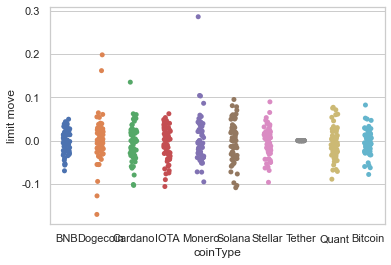

In [7]:
sns.stripplot(x='coinType', y='limit move', data=newData)

e:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the 

<AxesSubplot:xlabel='coinType', ylabel='limit move'>

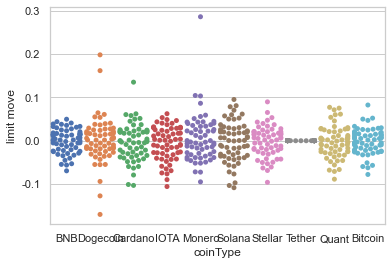

In [8]:
sns.swarmplot(x='coinType', y='limit move', data=newData)

### 分布图
参数基本等同散点图<br>
<span class="mark">boxplot</span>:箱线图，表达各分类下数据4分位数和离群点信息，常用于查看数据异常值等<br>
<span class="mark">boxenplot</span>:=box+enhenced+plot，在标准箱线图基础上增加了更多的分位数信息，绘图效果更为美观，信息量更大<br>
<span class="mark">violinplot</span>:小提琴图，=boxplot+kdeplot，在标准箱线图基础上增加了kde图的信息，可更直观的查看数据分布情况。在hue分类仅有2个取值时，可通过设置split参数实现左右数据合并显示<br>

<AxesSubplot:xlabel='coinType', ylabel='limit move'>

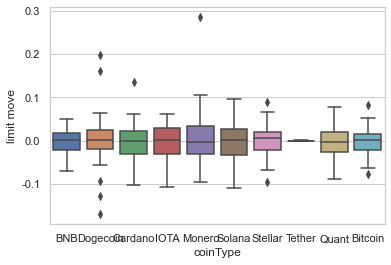

In [9]:
sns.boxplot(x='coinType', y='limit move', data=newData)

<AxesSubplot:xlabel='coinType', ylabel='limit move'>

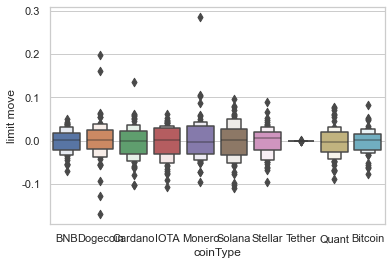

In [10]:
sns.boxenplot(x='coinType', y='limit move', data=newData)

<AxesSubplot:xlabel='coinType', ylabel='limit move'>

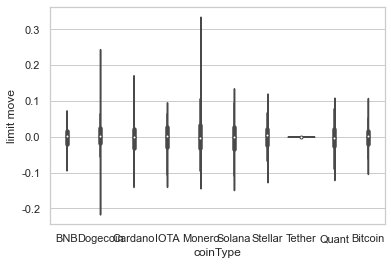

In [11]:
sns.violinplot(x='coinType', y='limit move', data=newData)

### 统计(估计)图
pointplot:给出数据的统计量（默认统计量为均值）和相应置信区间（默认值为95%,即参数ci=95），并以相应的点和线进行绘图显示<br>
barplot:以柱状图表达统计量，而置信区间则与前者一致，仅仅是适用场景不同而已<br>
**注**：当x轴分类变量为连续日期数据时，选用pointplot得到的绘图意义更为明确；而对于其他分类型变量，则选用barplot更为合适<br>
countplot:仅用于表达各分类值计数，并以柱状图的形式展现

<AxesSubplot:xlabel='coinType', ylabel='limit move'>

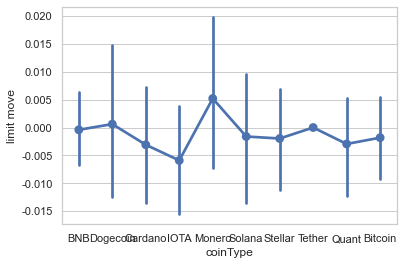

In [12]:
sns.pointplot(x='coinType', y='limit move', data=newData)

<AxesSubplot:xlabel='coinType', ylabel='limit move'>

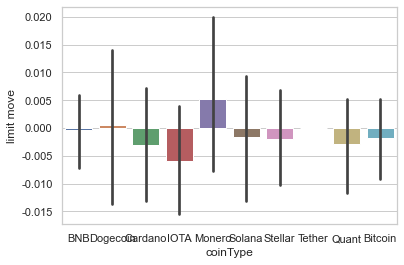

In [13]:
sns.barplot(x='coinType', y='limit move', data=newData)

### figure-level分类绘图总接口
<span style="color:orange">catplot</span>: =category+plot,与其他分类数据绘图接口的关系相当于lmplot 与regplot的关系.同时catplot中还可通过kind参数实现前面除countplot外的所有绘图接口，功能更为强大。kind默认为strip，此时等效于stripplot接口

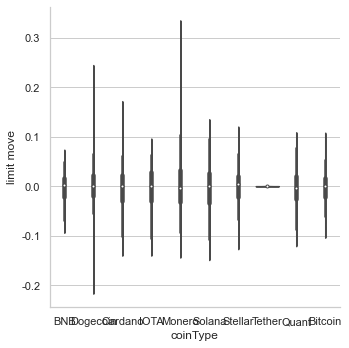

In [14]:
sns.catplot(x='coinType', y='limit move', data=newData,kind='violin')

## 其他

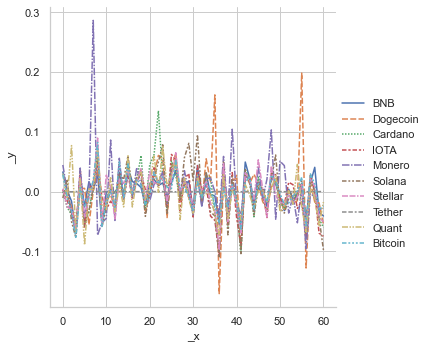

In [15]:
wideData=coinData.drop(labels="Time",axis=1)
sns.relplot(data=wideData,kind="line")

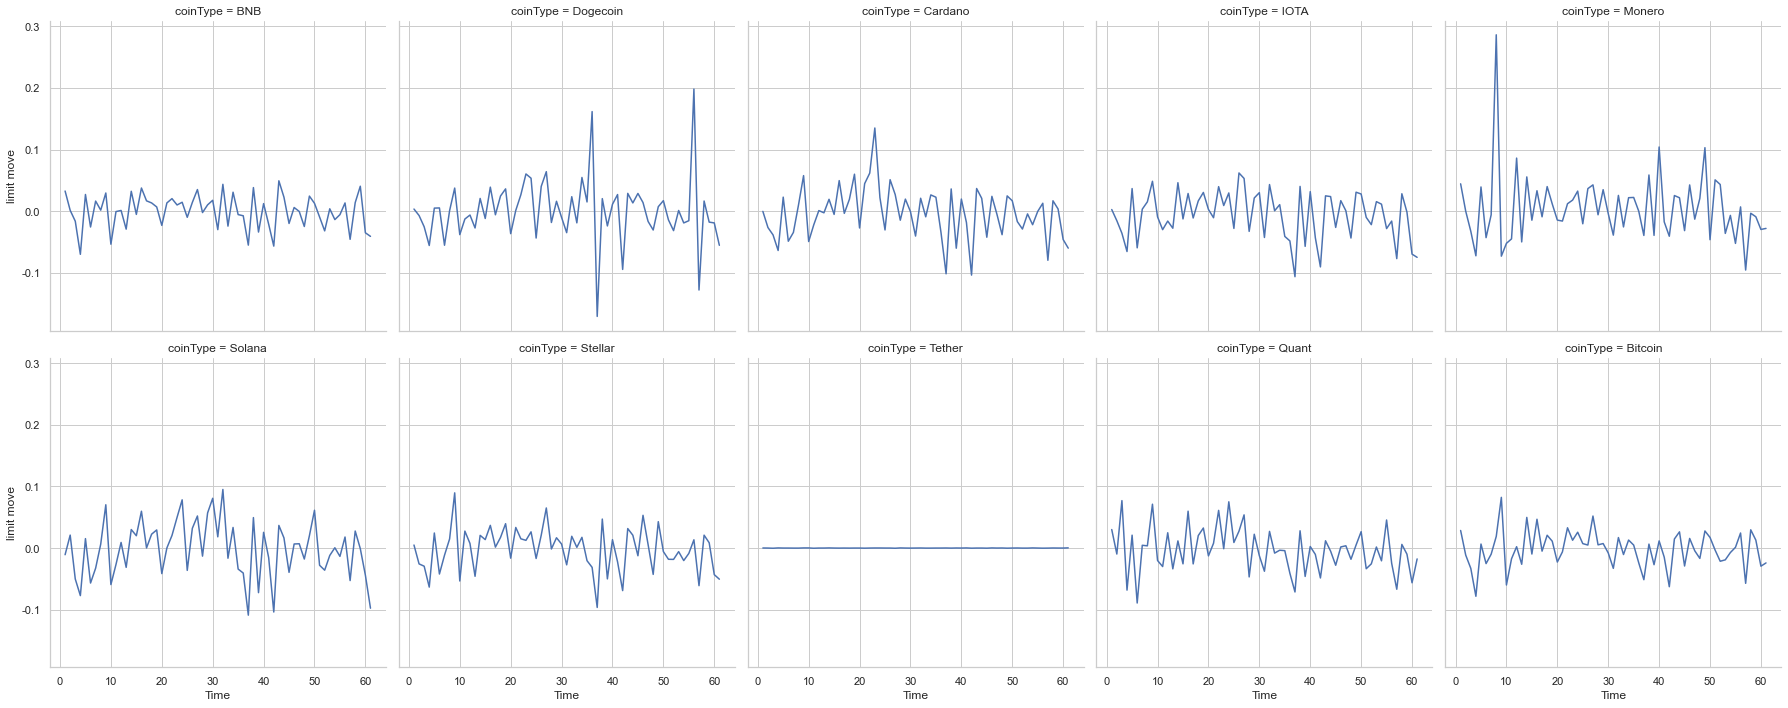

In [16]:
#longData=newData.drop(labels="Time",axis=1)
sns.relplot(data=newData,
            x="Time",
            y="limit move",
            kind="line",
            col="coinType",
            col_wrap=5)

# Plotly Express

In [17]:
px.box(newData,
       y="limit move",
       color="coinType",
       title="十种加密货币在2022年3、4月的日度涨跌幅箱线图")

In [18]:
px.scatter(
          newData,
          x="Time",
          y="limit move",
          color="coinType",
          range_x=[1, 61],
          range_y=[-0.2,0.3],
          facet_col="coinType",
          facet_col_wrap=3,
          title="十种加密货币日度2022年3、4月涨跌幅散点图"
)